<a href="https://colab.research.google.com/github/AnujaS75/Machine-Learning-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data=pd.read_csv('/content/house .csv')

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
data.shape

(4600, 18)

In [ ]:
data.size

82800

In [ ]:
data.ndim

2

In [ ]:
data.head

<bound method NDFrame.head of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]>

In [ ]:
data.tail

<bound method NDFrame.tail of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]>

In [ ]:
data.describe

<bound method NDFrame.describe of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]>

In [ ]:
data.info

<bound method DataFrame.info of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]>

<Axes: xlabel='bedrooms', ylabel='price'>

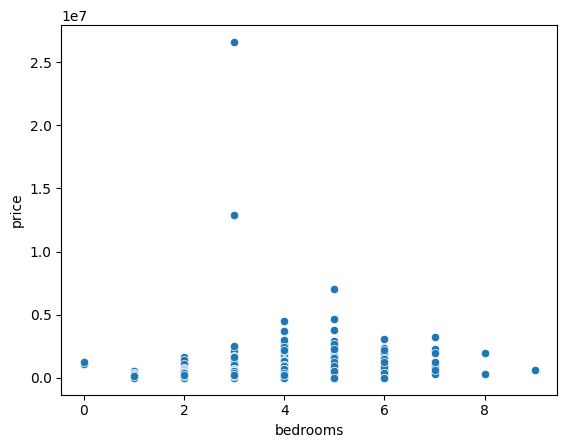

In [ ]:
sns.scatterplot(x=data['bedrooms'],y=data['price'])

<Axes: >

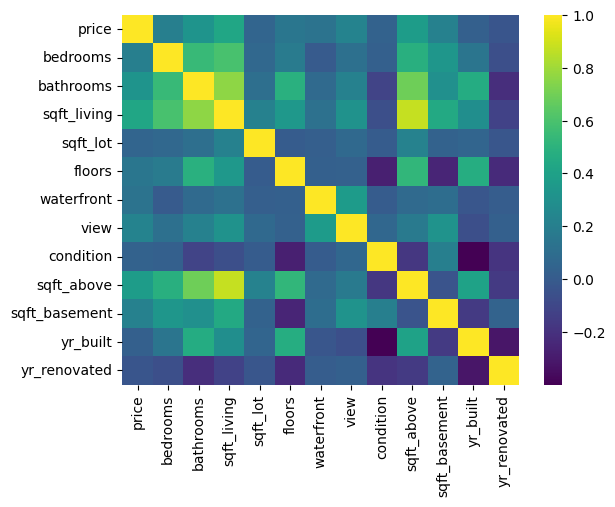

In [ ]:
sns.heatmap(data.corr(numeric_only=True),cmap='viridis')

<Axes: xlabel='bedrooms'>

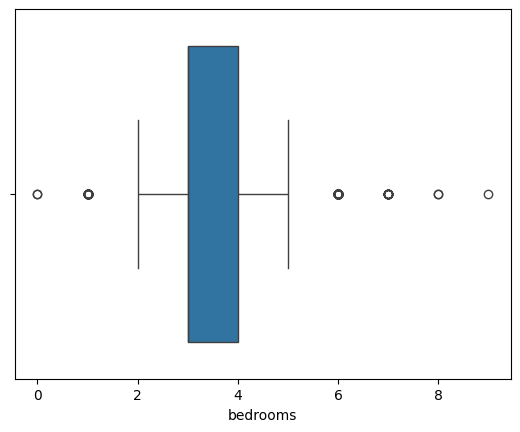

In [ ]:
sns.boxplot(x=data['bedrooms'])

In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
x=data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated',]]
y=data[['price']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction=model.predict(x_test)
prediction

array([[ 304863.38578076],
       [ 326517.06991516],
       [1071762.53630098],
       [ 546241.40097359],
       [ 379799.98321087],
       [ 605792.9362275 ],
       [ 481263.57120657],
       [ 418905.11058143],
       [ 509341.50791926],
       [ 530852.97588255],
       [ 682958.97641218],
       [ 414525.36130069],
       [ 836974.40259905],
       [ 416500.85730826],
       [ 367263.4338823 ],
       [ 702908.51672181],
       [ 677878.69067807],
       [ 515539.32998557],
       [1019380.63891391],
       [ 861119.79490667],
       [1364866.21814685],
       [ 637439.70016771],
       [ 634739.5666634 ],
       [ 470424.21250268],
       [ 162037.1538305 ],
       [ 232831.37648252],
       [ 669951.05071604],
       [ 884080.66694998],
       [ 263027.2257721 ],
       [ 974954.64229479],
       [1883342.16391312],
       [ 481510.29664868],
       [1275554.65253673],
       [ 430994.93178867],
       [ 180366.40705427],
       [ 339240.17357425],
       [ 792335.74094019],
 

In [ ]:
new_data=[[3,4,5,6,7,8,8,9,99,23,45,67]]
price=model.predict(new_data)
print("the predicted price",price)

the predicted price [[8946253.33117983]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
